In [1]:
#pip install h2o

In [2]:
# Se estable el filtro de advertencias para que ignore todas las advertencias que se generen durante la ejecución del código
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Se importa la biblioteca h2o y con la clase H2oAutoML se proporciona una interfaz fácil de usar para entrenar modelos de aprendizaje automático. A su vez se inicializa el servidor H2O en el entorno de Python.

In [4]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)
  Starting server from C:\Users\Josvaldes\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Josvaldes\AppData\Local\Temp\tmpmpbnaxkz
  JVM stdout: C:\Users\Josvaldes\AppData\Local\Temp\tmpmpbnaxkz\h2o_Josvaldes_started_from_python.out
  JVM stderr: C:\Users\Josvaldes\AppData\Local\Temp\tmpmpbnaxkz\h2o_Josvaldes_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_Josvaldes_mtoxet
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.934 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [5]:
# Importo las librerias
import pandas as pd
import numpy as np

In [6]:
# Cargo el dataset como un dataframe
df = pd.read_csv('predictive_maintenance.csv')

In [7]:
# Se crea un diccionario llamado target_mapping que mapea los valores numéricos 0 y 1 a las etiquetas "No" y "Sí", respectivamente. Luego, utiliza el método map() de Pandas para aplicar este mapeo a la columna 'Target' del DataFrame df.

In [8]:
target_mapping = {0: "No", 1: "Sí"}
df['Target'] = df['Target'].map(target_mapping)

In [9]:
# Visualizacion del dataframe
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,No,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,No,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,No,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,No,No Failure


In [10]:
# Se separa entre train y test
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [11]:
# Se convierten los dataframe de pandas a dataframe de H20
train = h2o.H2OFrame(df_train) 
test = h2o.H2OFrame(df_test) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
# Visualización del conjunto de entrenamiento
train

UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,M14860,M,298.1,308.6,1551,42.8,0,No,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,No,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,No,No Failure
6,M14865,M,298.1,308.6,1425,41.9,11,No,No Failure
7,L47186,L,298.1,308.6,1558,42.4,14,No,No Failure
8,L47187,L,298.1,308.6,1527,40.2,16,No,No Failure
9,M14868,M,298.3,308.7,1667,28.6,18,No,No Failure
10,M14869,M,298.5,309,1741,28,21,No,No Failure
11,H29424,H,298.4,308.9,1782,23.9,24,No,No Failure
12,H29425,H,298.6,309.1,1423,44.3,29,No,No Failure


In [13]:
# Visualización del conjunto de prueba
test

UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
3,L47182,L,298.1,308.5,1498,49.4,5,No,No Failure
5,L47184,L,298.2,308.7,1408,40,9,No,No Failure
23,M14882,M,298.9,309.3,1581,30.7,65,No,No Failure
26,L47205,L,299,309.5,1861,23.3,73,No,No Failure
27,L47206,L,299.1,309.5,1512,39,75,No,No Failure
45,M14904,M,298.8,309.1,1472,47.5,125,No,No Failure
50,M14909,M,298.9,309.2,1412,44.1,140,No,No Failure
56,L47235,L,298.8,309.1,1512,40.7,156,No,No Failure
67,M14926,M,298.9,308.9,1679,28.7,181,No,No Failure
74,L47253,L,299,309.1,1592,35,200,No,No Failure


In [14]:
# Se define cuales columnas son las variables de entrenamiento y cual es el target. 
x = train.columns
y = 'Target'
if y in x:
    x.remove(y)
else:
    print("La variable objetivo no está en la lista de características.")

In [15]:
# For binary classification, response should be a factor
# Se prepara los datos para un problema de clasificación binaria, donde la variable objetivo 'Target' es categórica
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [16]:
# Entreno el modelo
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2)
aml.train(x=x, y='Target', training_frame=train)

AutoML progress: |
10:55:45.497: AutoML: XGBoost is not available; skipping it.
10:55:45.546: _train param, Dropping bad and constant columns: [Product ID]

██
10:55:48.310: _train param, Dropping bad and constant columns: [Product ID]

█
10:55:52.337: _train param, Dropping bad and constant columns: [Product ID]

██
10:55:55.12: _train param, Dropping bad and constant columns: [Product ID]

██
10:55:58.991: _train param, Dropping bad and constant columns: [Product ID]

█
10:56:01.834: _train param, Dropping bad and constant columns: [Product ID]

██
10:56:04.614: _train param, Dropping bad and constant columns: [Product ID]

█
10:56:06.826: _train param, Dropping bad and constant columns: [Product ID]

██
10:56:09.457: _train param, Dropping bad and constant columns: [Product ID]

██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240501_105545_model_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    77                 77                          33326                  6            6            6             16            45            29.7143

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00012911651429177638
RMSE: 0.011362944789612259
LogLoss: 0.0008336087480232372
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5890344929238166
       No    Sí    Error    Rate
-----  ----  ----  -------  ------------
No     7705  0     0        (0.0/7705.0)
Sí     0     271   0        (0.0/271.0)
Total  7705  271   0        (0.0/7976.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.589034     1        171
max f2                       0.589034     1        171
max f0point5                 0.589034     1        171
max accuracy                 0.589034     1        171
max precision                0.999845     1        0
max recall                   0.589034     1        171
max specificity              0.999845     1        0
max absolute_mcc             0.589034     1        171
max min_per_class_accuracy   0.589034     1        171
max mean_per_class_accuracy  0.589034     1        171
max tns                      0.999845     7705     0
max fns                      0.999845     270      0
max fps                      4.02576e-05  7705     399
max tps                      0.589034     271      171
max tnr                      0.999845     1        0
max fnr                      0.999845     0.99631  0
max fpr                      4.02576e-05  1        399
max tpr                      0.589034     1        171

Gains/Lift Table: Avg response rate:  3,40 %, avg score:  3,37 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100301                   0.997857           29.4317  29.4317            1                0.998572     1                           0.998572            0.295203        0.295203                   2843.17  2843.17            0.295203
2        0.0200602                   0.996081           29.4317  29.4317            1                0.996988     1                           0.99778             0.295203        0.590406                   2843.17  2843.17            0.590406
3        0.0300903                   0.987669           29.4317  29.4317            1                0.992991     1                           0.996184            0.295203        0.885609                   2843.17  2843.17            0.885609
4        0.0401204                   0.00327776         11.4048  24.925             0.3875           0.353374     0.846875                    0.835481            0.114391        1                          1040.48  2392.5             0.99364
5        0.0500251                   0.00161974         0        19.99              0                0.00219733   0.679198                    0.670495            0               1                          -100     1899 

## Análisis de los resultados
El modelo entrenado es un modelo de Gradient Boosting Machine (GBM) que ha sido ajustado utilizando H2O's AutoML. Aquí hay un resumen de algunas de las métricas y resultados más importantes:

- Modelo Key: GBM_grid_1_AutoML_2_20240501_102222_model_3
- Tipo de Modelo: Gradient Boosting Machine
- Resumen del Modelo:
    Número de árboles: 100
    Tamaño del modelo en bytes: 44373
    Profundidad mínima y máxima del árbol: 6
    Error de clasificación promedio: 0.0
    AUC (Área bajo la curva ROC): 1.0
    AUCPR (Área bajo la curva PR): 1.0
- Métricas en datos de entrenamiento:
    MSE (Error cuadrático medio): 6.448e-05
    RMSE (Error cuadrático medio): 0.00803
    LogLoss: 0.000417
    Error de clasificación promedio: 0.0
- Matriz de confusión para max f1 @ threshold:
    No (Act) / No (Pred): 7700 (Verdadero Negativo)
    Sí (Act) / Sí (Pred): 268 (Verdadero Positivo)
- Métricas de Cross-Validation:
    AUC promedio: 0.993
    AUCPR promedio: 0.978
    Error de clasificación promedio: 0.0009
- Importancia de variables:
    La variable "Failure Type" es la más importante seguida por "Torque [Nm]" y "Rotational speed [rpm]".

Estos resultados muestran que el modelo ha aprendido bien con los datos de entrenamiento y tiene un alto rendimiento en la clasificación binaria del conjunto de datos.

In [17]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_1_20240501_105545_model_3,0.991268,0.0082265,0.978925,0.0129151,0.030522,0.000931592
GBM_3_AutoML_1_20240501_105545,0.990468,0.00809976,0.977165,0.0129151,0.029694,0.000881736
GBM_2_AutoML_1_20240501_105545,0.989735,0.00776406,0.977288,0.0129151,0.0296611,0.000879783
GBM_grid_1_AutoML_1_20240501_105545_model_4,0.988672,0.0109218,0.977556,0.0129151,0.0376267,0.00141577
GBM_1_AutoML_1_20240501_105545,0.988661,0.00822871,0.977013,0.0129151,0.029861,0.00089168
XRT_1_AutoML_1_20240501_105545,0.988326,0.364287,0.968968,0.0484896,0.312271,0.0975133
GBM_4_AutoML_1_20240501_105545,0.987978,0.00793167,0.976979,0.0129151,0.0296878,0.000881367
GBM_grid_1_AutoML_1_20240501_105545_model_2,0.987915,0.00768445,0.976658,0.0129151,0.0299224,0.000895349
GBM_grid_1_AutoML_1_20240501_105545_model_5,0.987751,0.00788811,0.976288,0.0129151,0.0296556,0.000879455
GBM_5_AutoML_1_20240501_105545,0.98774,0.00770886,0.977108,0.0129151,0.0296606,0.000879749


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20240501_105545,0.994895,0.0135572,0.976332,0.0147059,0.0367335,0.00134935,471,0.010517,DRF
GBM_grid_1_AutoML_1_20240501_105545_model_2,0.994857,0.00814439,0.975417,0.0147059,0.0314715,0.000990454,513,0.021256,GBM
GBM_1_AutoML_1_20240501_105545,0.994256,0.00847404,0.974981,0.0147059,0.0317385,0.00100733,610,0.025816,GBM
GBM_grid_1_AutoML_1_20240501_105545_model_4,0.994196,0.0118184,0.977374,0.0147059,0.0436097,0.00190181,1156,0.042277,GBM
GBM_grid_1_AutoML_1_20240501_105545_model_3,0.992906,0.00881453,0.976704,0.0147059,0.0319646,0.00102173,722,0.022452,GBM
GBM_5_AutoML_1_20240501_105545,0.99282,0.00835441,0.974216,0.0147059,0.0314687,0.000990282,536,0.018135,GBM
GBM_2_AutoML_1_20240501_105545,0.991944,0.00854524,0.973985,0.0147059,0.0314746,0.000990648,462,0.016832,GBM
DeepLearning_1_AutoML_1_20240501_105545,0.991019,0.017562,0.973347,0.0149615,0.0431763,0.00186419,413,0.00884,DeepLearning
GBM_grid_1_AutoML_1_20240501_105545_model_1,0.990903,0.0127367,0.977753,0.0147059,0.0405756,0.00164638,1573,0.045901,GBM
GBM_3_AutoML_1_20240501_105545,0.990621,0.00911253,0.973458,0.0147059,0.0314764,0.000990767,645,0.019343,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240501_105545_model_3

,No,Sí,Error,Rate
No,1956.0,0.0,0.0,(0.0/1956.0)
Sí,2.0,66.0,0.0294,(2.0/68.0)
Total,1958.0,66.0,0.001,(2.0/2024.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

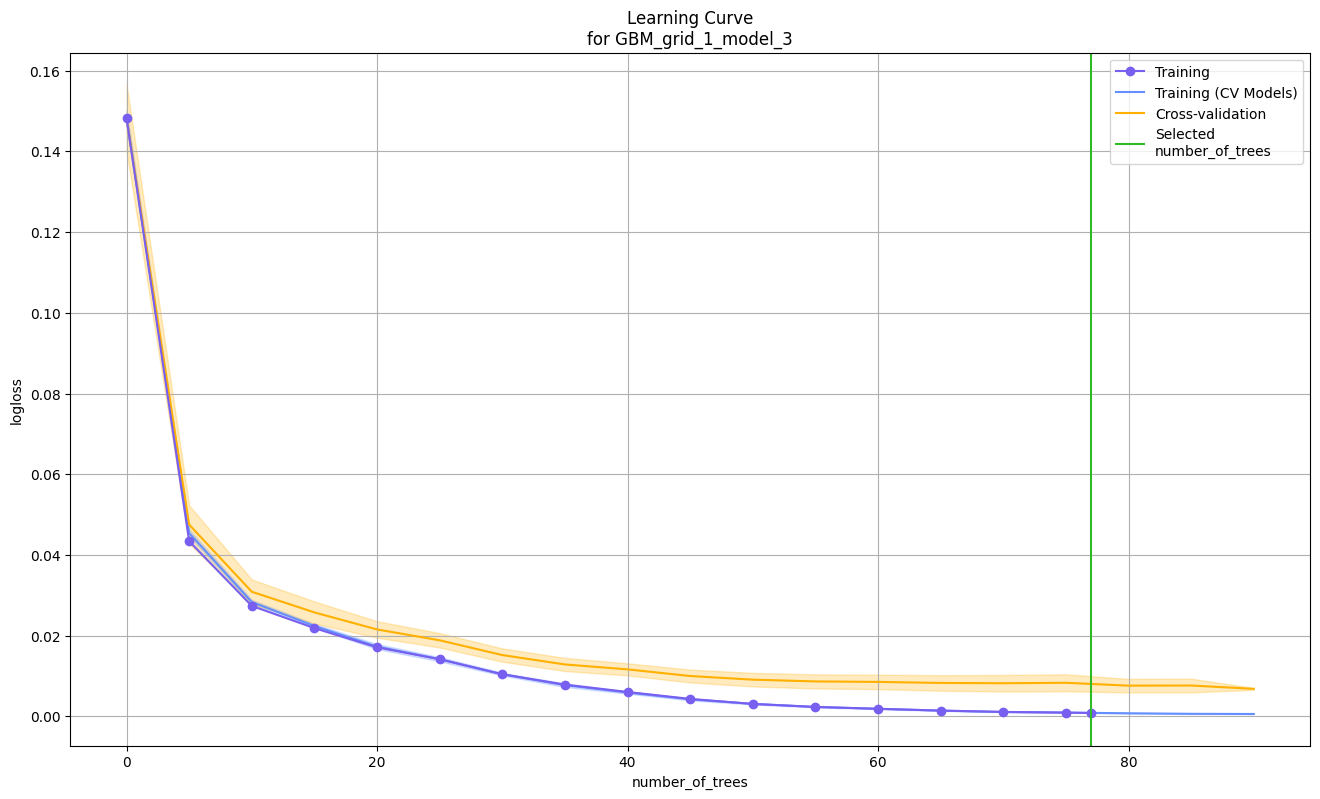

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

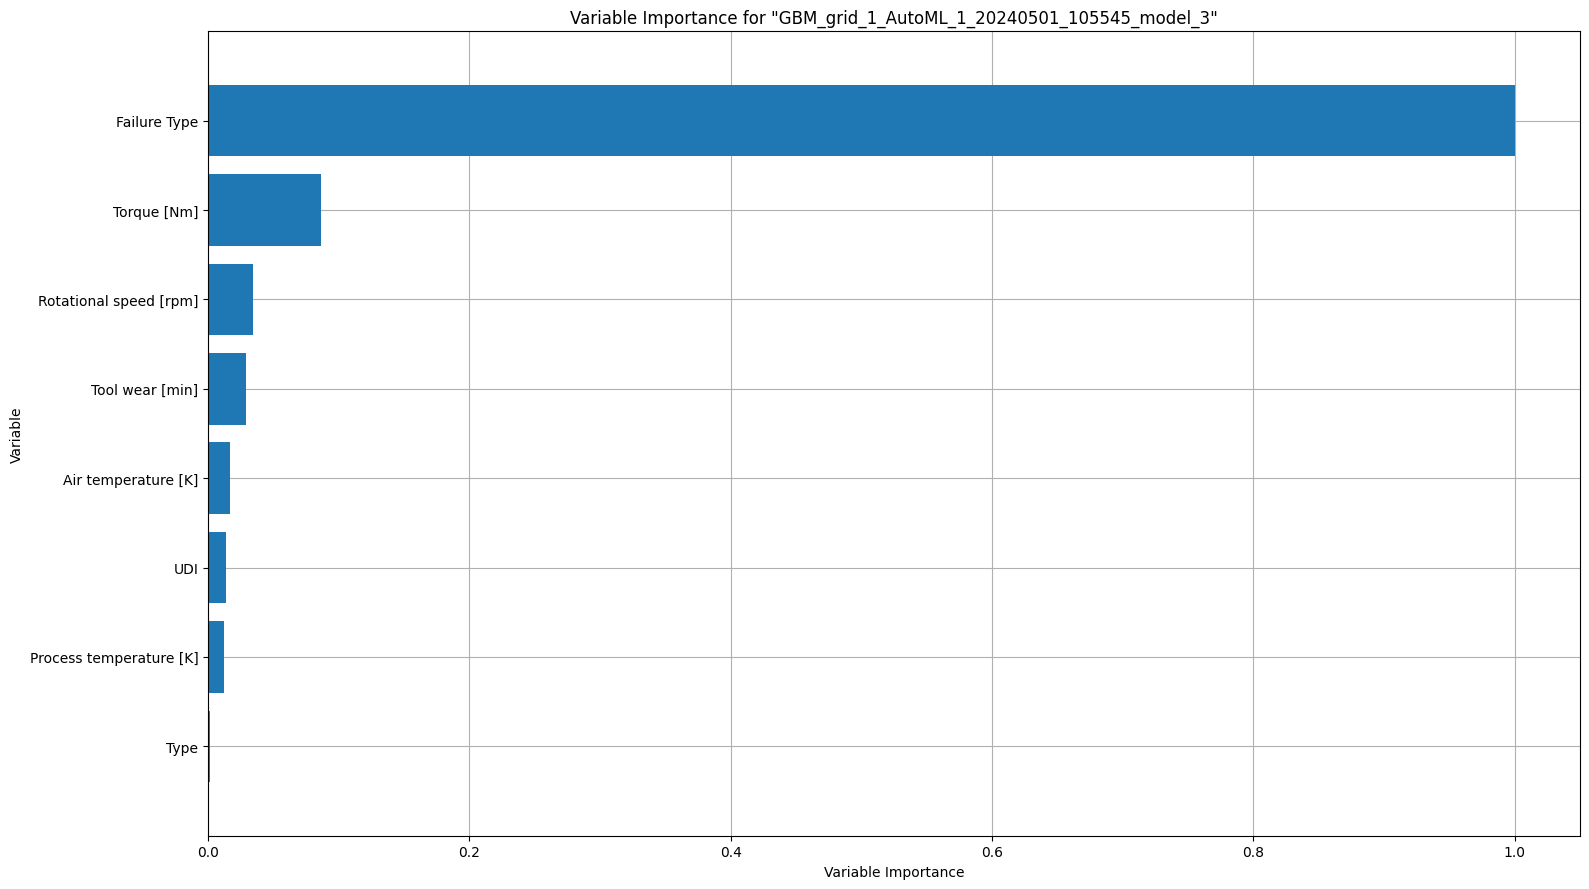

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

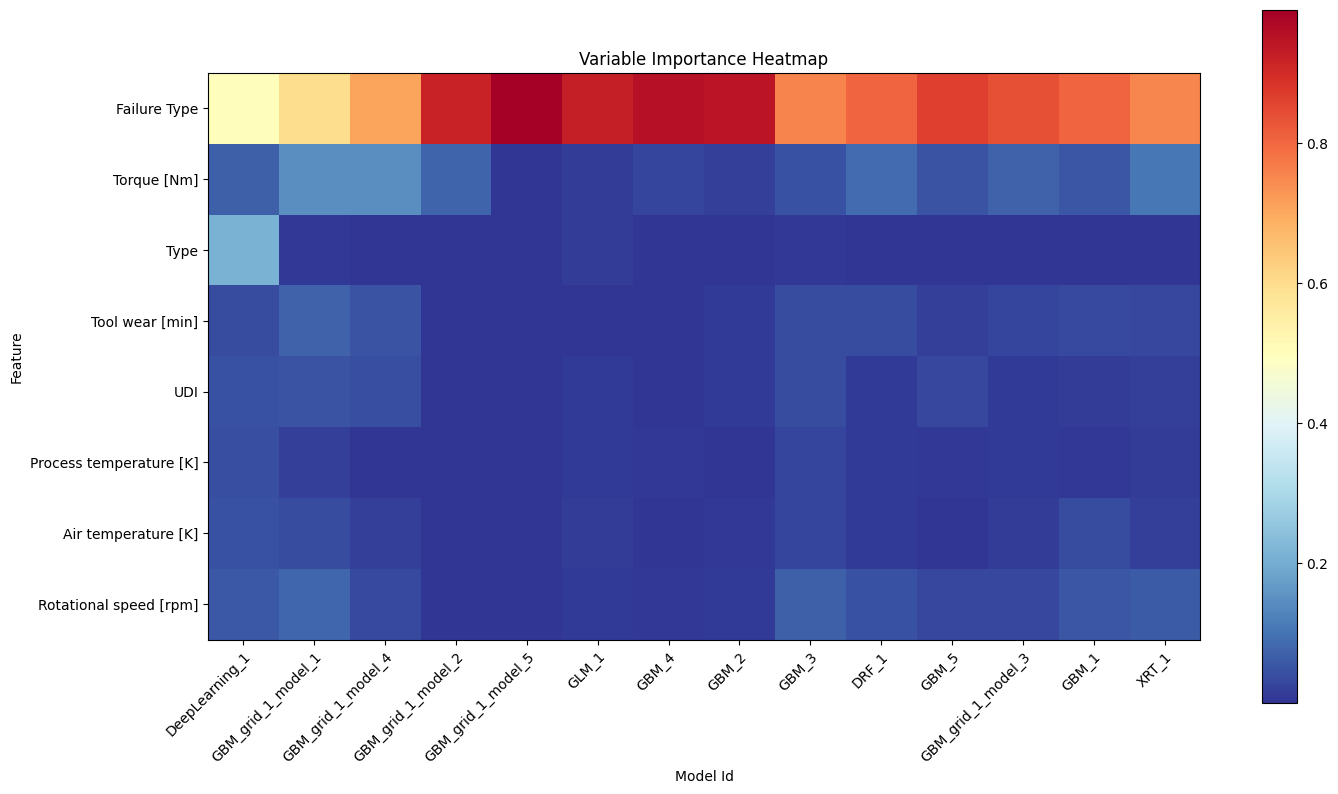

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

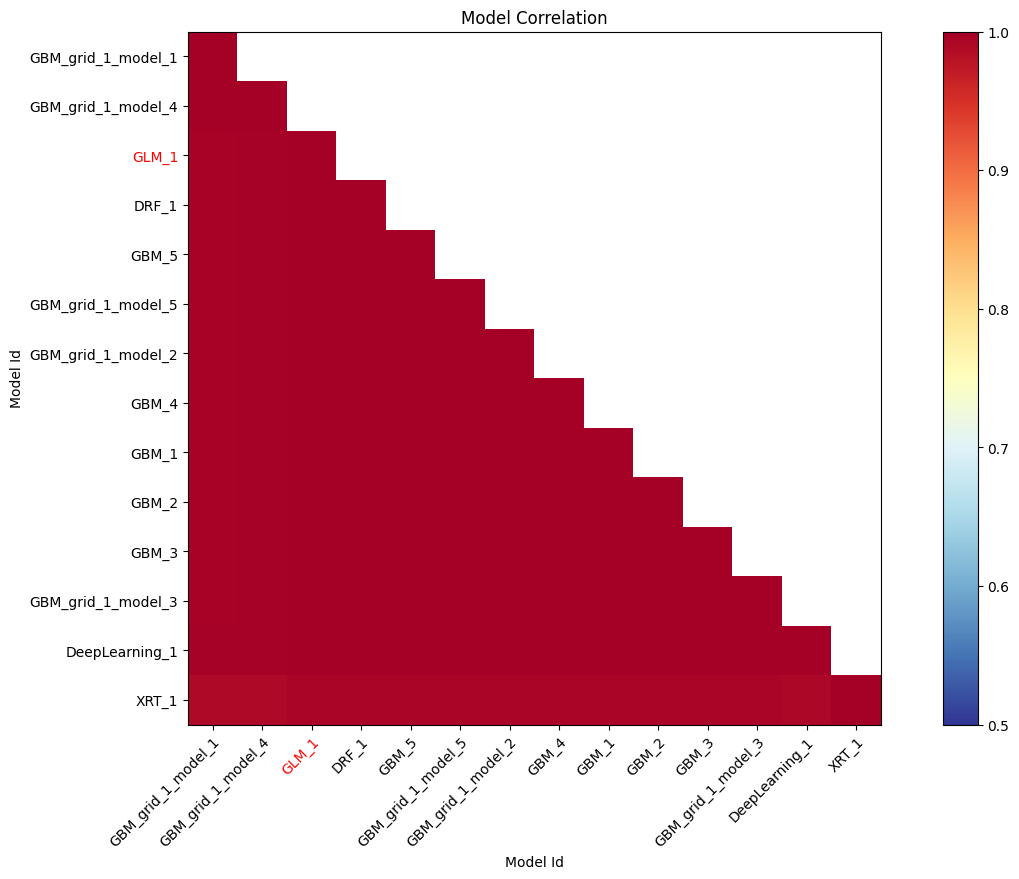

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

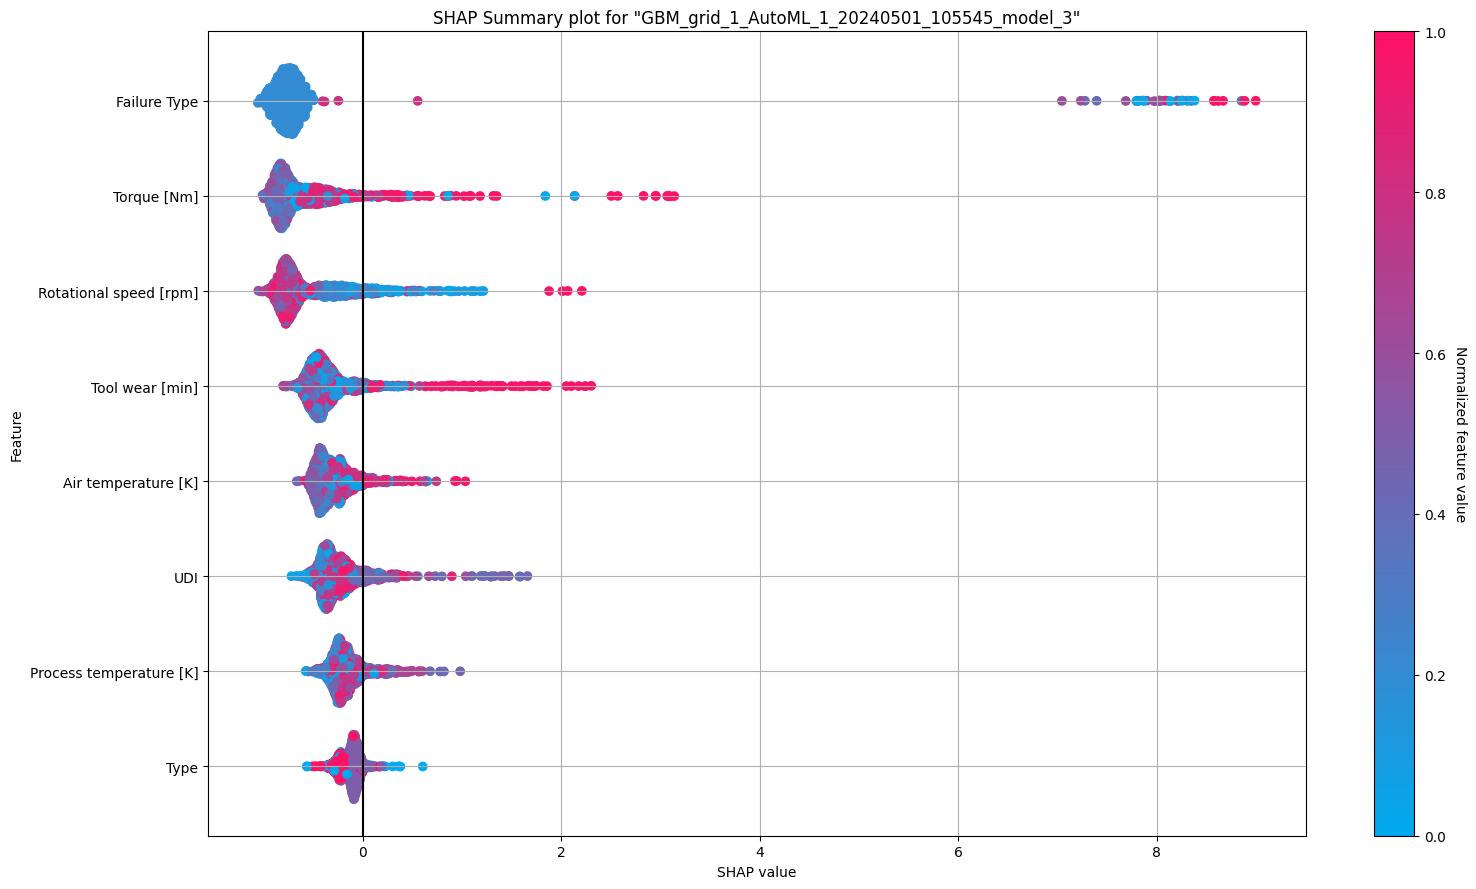

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

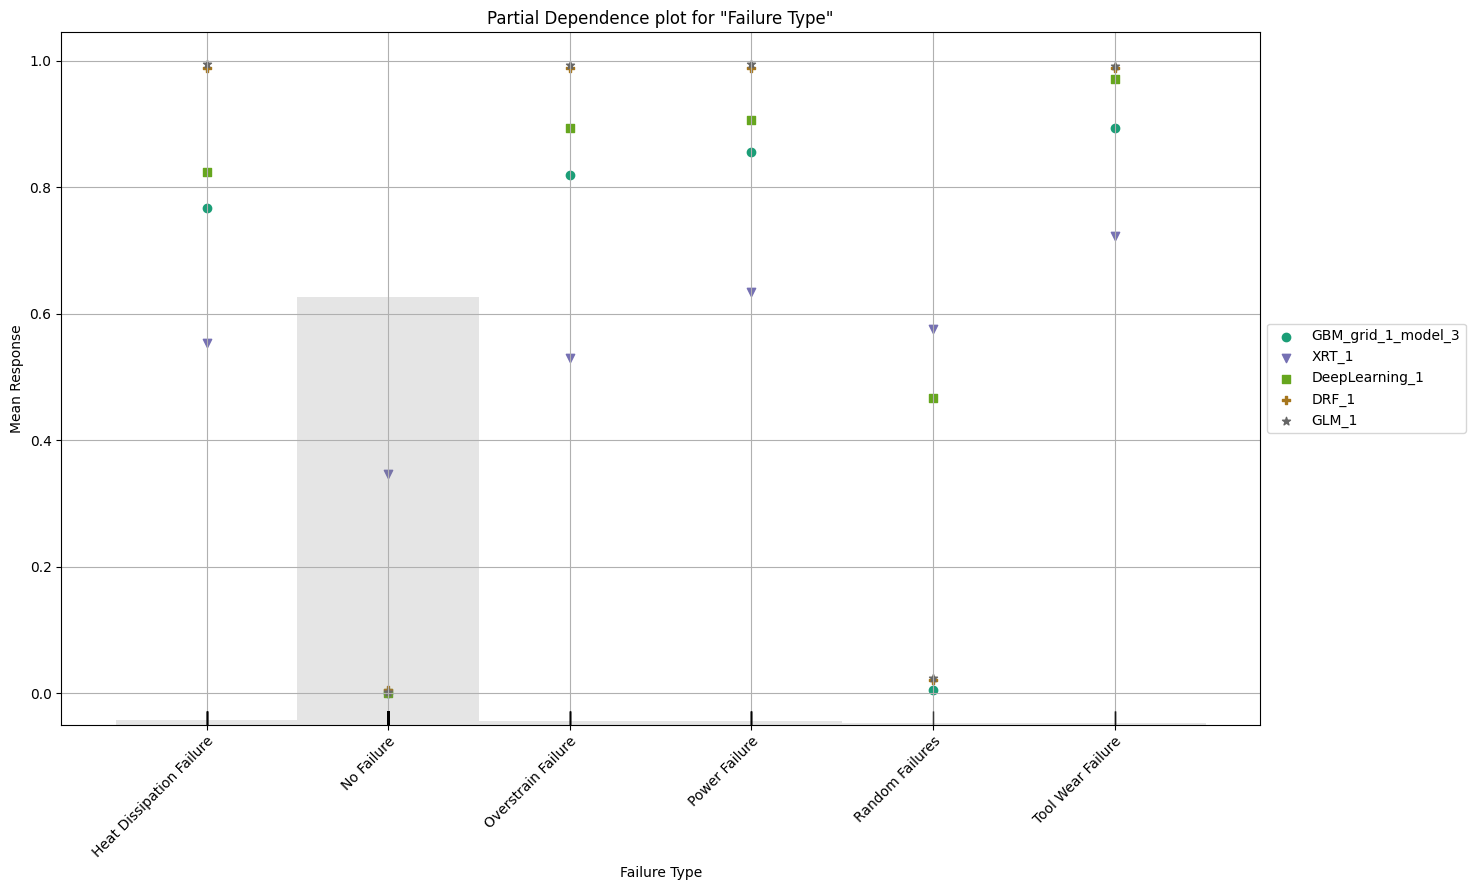

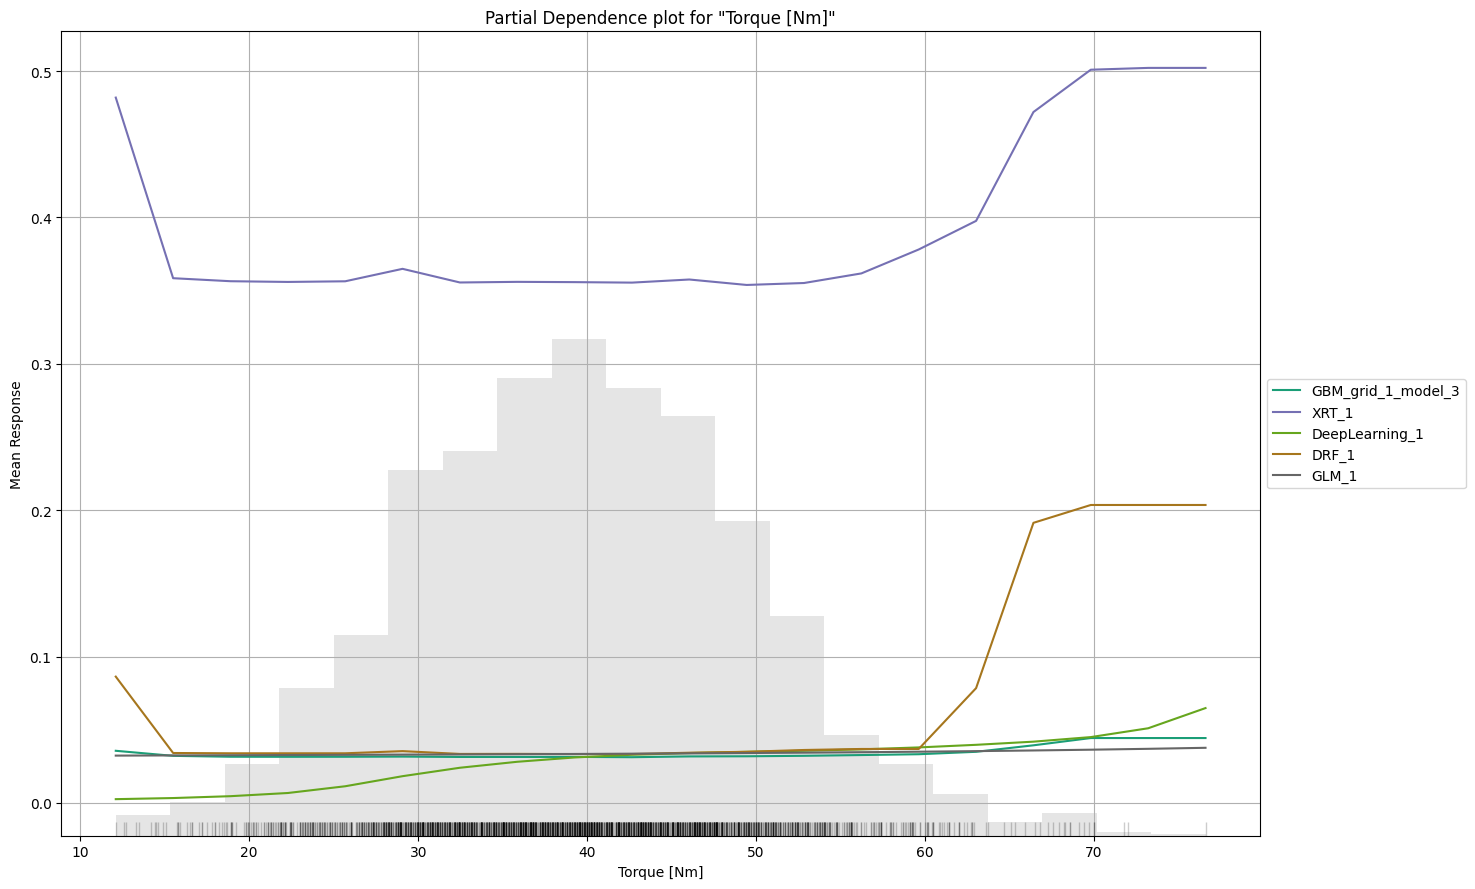

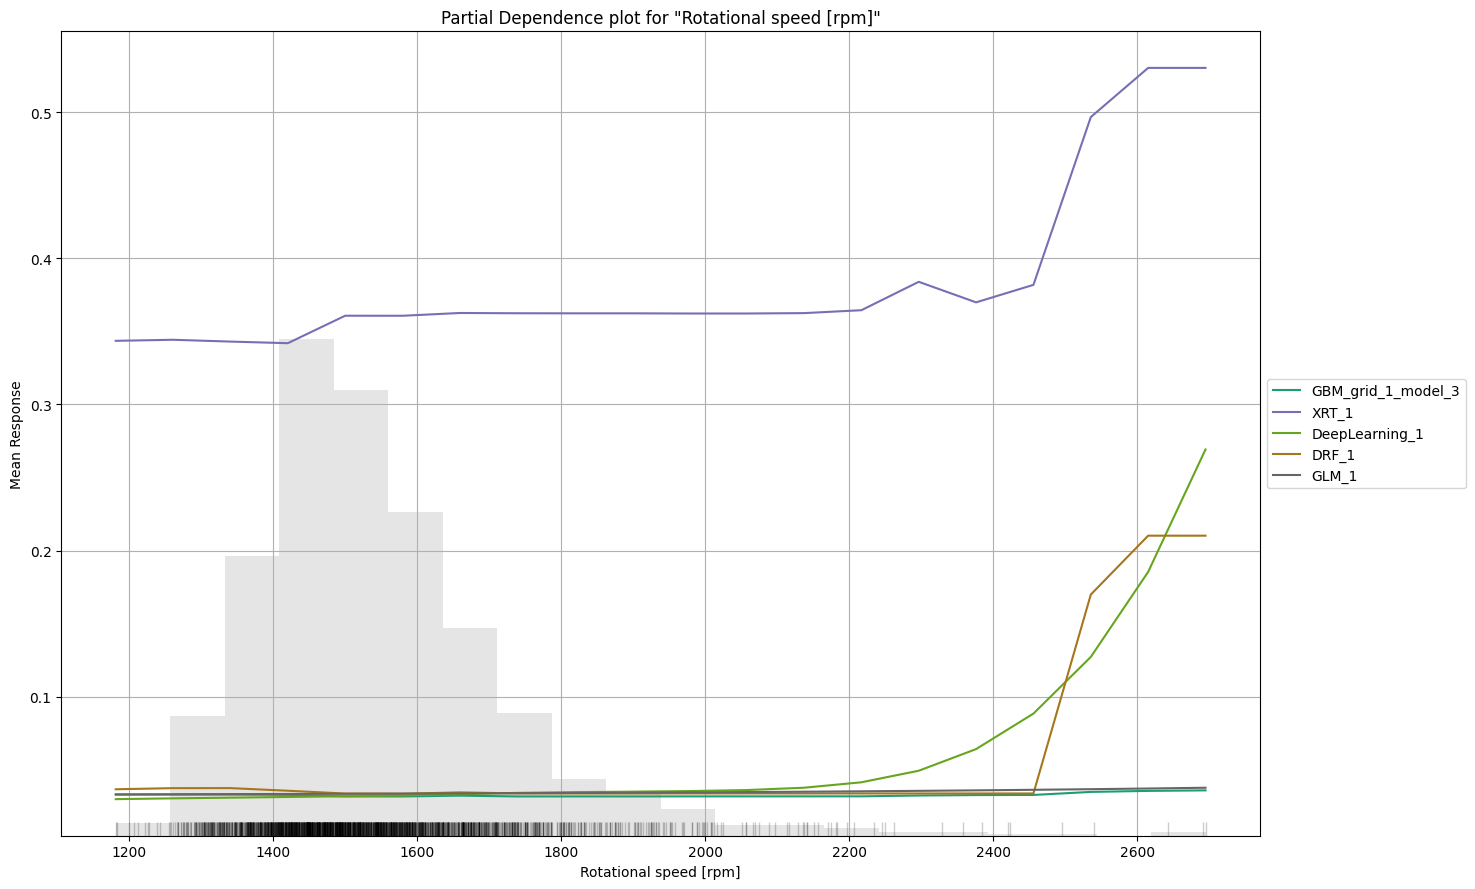

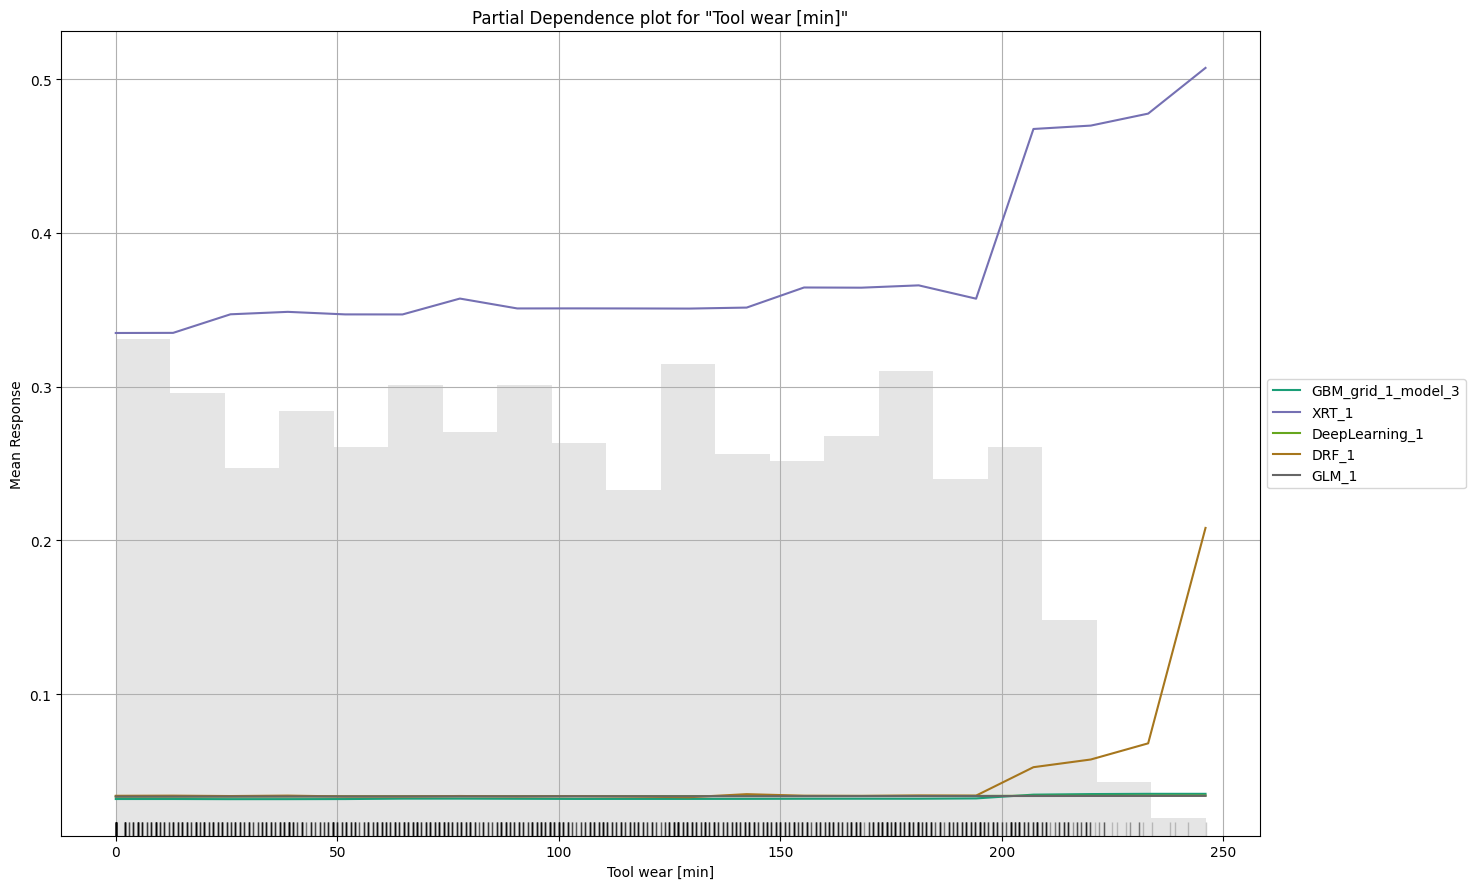

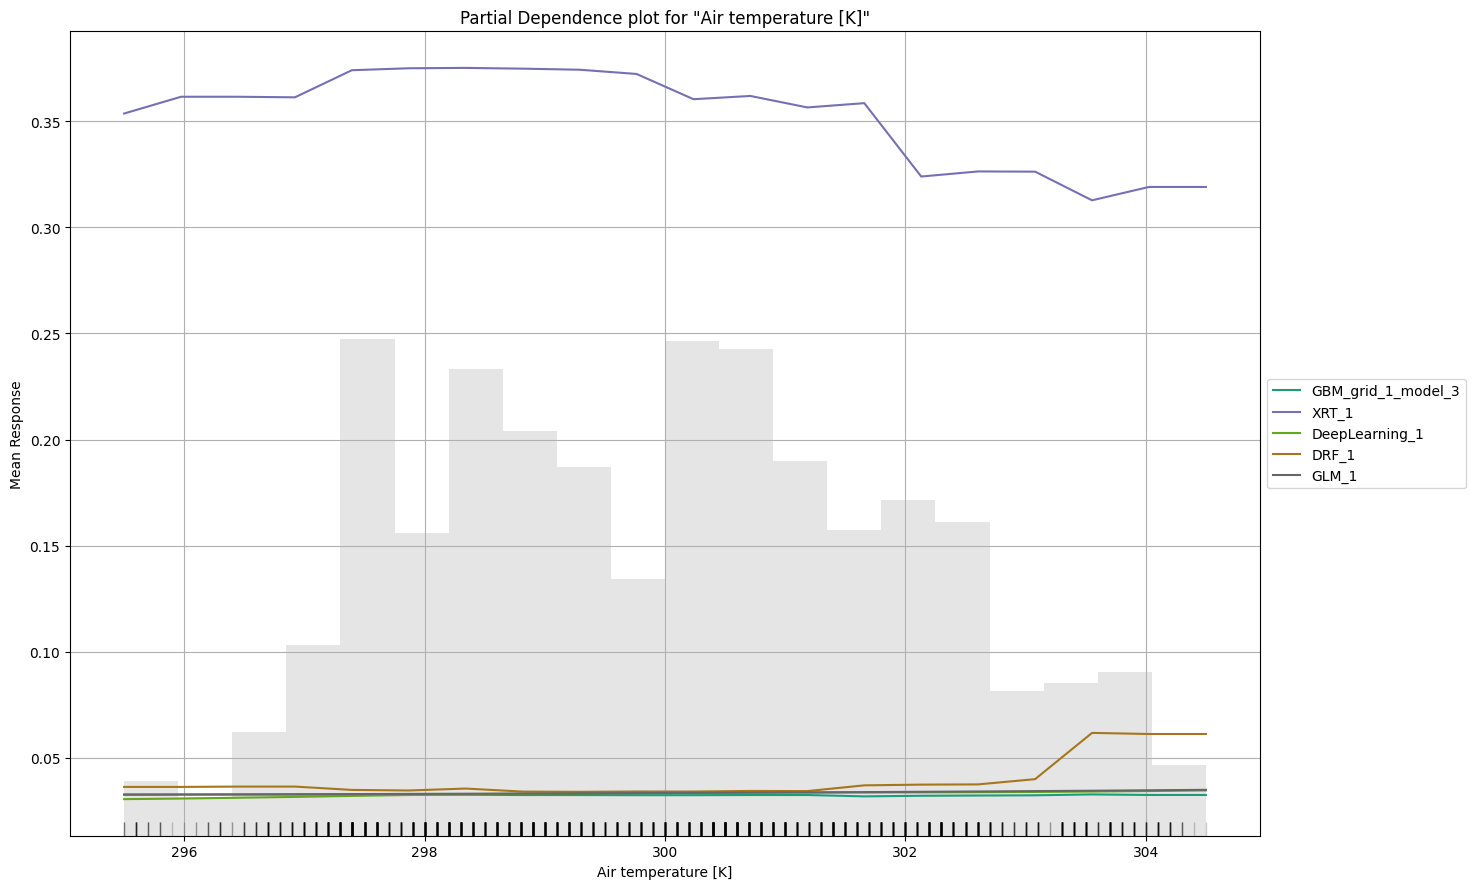

In [18]:
# Descripcion de todos los modelos entrenados
exa = aml.explain(test)

## Análisis de las salidas

Resumen:

- Ranking de modelos: Se muestra un ranking de los modelos entrenados junto con métricas como AUC, logloss, AUCPR, mean_per_class_error, rmse y mse. Estos modelos son clasificados según su rendimiento en estas métricas.
- Descripción de todos los modelos entrenados: Se proporciona una tabla detallada que incluye información sobre cada modelo entrenado, como el ID del modelo, métricas de rendimiento como AUC, logloss, AUCPR, mean_per_class_error, rmse y mse, así como el tiempo de entrenamiento y tiempo de predicción por fila.
- Matriz de confusión: Se muestra la matriz de confusión para uno de los modelos (GBM_grid_1_AutoML_1_20240501_92548_model_3) que muestra la comparación entre las clases reales y las clases predichas.
- Gráfica de Curva de Aprendizaje: Muestra la curva de aprendizaje que representa la pérdida/métrica en función del número de iteraciones o árboles para algoritmos basados en árboles.
- Importancia de variables: Se muestra la importancia relativa de las variables más importantes en el modelo.
- Mapa de calor de Importancia de Variables: Muestra la importancia de las variables a través de varios modelos en forma de mapa de calor.
- Correlación de modelos: Muestra la correlación entre las predicciones de los modelos.
- Resumen SHAP: Muestra la contribución de las características para cada instancia de datos utilizando SHAP (SHapley Additive exPlanations).
- Gráficos de Dependencia Parcial: Muestra la dependencia parcial de las variables, es decir, el efecto marginal de una variable sobre la respuesta.
- Esta salida proporciona una visión completa del proceso de AutoML, incluyendo el rendimiento de los modelos entrenados y diversas herramientas para el análisis y la interpretación de los resultados.

In [19]:
# Performande del mejor modelo
aml.leader.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0010217348169559554
RMSE: 0.0319645869198392
LogLoss: 0.008814529575256604
Mean Per-Class Error: 0.014705882352941176
AUC: 0.9929064417177914
AUCPR: 0.9767037942704414
Gini: 0.9858128834355828

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7907086984972453
       No    Sí    Error    Rate
-----  ----  ----  -------  ------------
No     1956  0     0        (0.0/1956.0)
Sí     2     66    0.0294   (2.0/68.0)
Total  1958  66    0.001    (2.0/2024.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.790709     0.985075  64
max f2                       0.790709     0.976331  64
max f0point5                 0.790709     0.993976  64
max accuracy                 0.790709     0.999012  64
max precision                0.999419     1         0
max recall                   0.000124285  1         323
max specificity              0.999419     1         0
max absolute_mcc             0.790709     0.984681  64
max min_per_class_accuracy   0.790709     0.970588  64
max mean_per_class_accuracy  0.790709     0.985294  64
max tns                      0.999419     1956      0
max fns                      0.999419     67        0
max fps                      3.77542e-05  1956      399
max tps                      0.000124285  68        323
max tnr                      0.999419     1         0
max fnr                      0.999419     0.985294  0
max fpr                      3.77542e-05  1         399
max tpr                      0.000124285  1         323

Gains/Lift Table: Avg response rate:  3,36 %, avg score:  3,26 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0103755                   0.997366           29.7647  29.7647            1                0.998351     1                           0.998351            0.308824        0.308824                   2876.47  2876.47            0.308824
2        0.0202569                   0.994319           29.7647  29.7647            1                0.996174     1                           0.997289            0.294118        0.602941                   2876.47  2876.47            0.602941
3        0.0301383                   0.964505           29.7647  29.7647            1                0.987223     1                           0.993988            0.294118        0.897059                   2876.47  2876.47            0.897059
4        0.0400198                   0.00338894         7.44118  24.2527            0.25             0.243216     0.814815                    0.808613            0.0735294       0.970588                   644.118  2325.27            0.96292
5        0.0503953                   0.00160051         0        19.2595            0                0.00210212   0.647059                    0.642566            0               0.970588                   -100     1825.95            0.952183
6        0.100296                    0.000585284        0.2947   9.82382            0.00990099       0.000887605  0.330049                    0.323307            0.0147059       0.985294                   -70.53   882.382            0.915764
7        0.150198                    0.000383695        0        6.55998            0                0.000474334  0.220395                    0.21605             0               0.985294                   -100     555.998            0.864128
8        0.200099                    0.0002

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,No,Sí
DRF_1_AutoML_1_20240501_105545,0.994895,0.0135572,0.976332,0.0147059,0.0367335,0.00134935,471,0.010517,DRF,No,1,0
GBM_grid_1_AutoML_1_20240501_105545_model_2,0.994857,0.00814439,0.975417,0.0147059,0.0314715,0.000990454,513,0.021256,GBM,No,0.999599,0.000400872
GBM_1_AutoML_1_20240501_105545,0.994256,0.00847404,0.974981,0.0147059,0.0317385,0.00100733,610,0.025816,GBM,No,0.999909,9.09297e-05
GBM_grid_1_AutoML_1_20240501_105545_model_4,0.994196,0.0118184,0.977374,0.0147059,0.0436097,0.00190181,1156,0.042277,GBM,No,0.999895,0.000104632
GBM_grid_1_AutoML_1_20240501_105545_model_3,0.992906,0.00881453,0.976704,0.0147059,0.0319646,0.00102173,722,0.022452,GBM,No,0.999922,7.82353e-05
GBM_5_AutoML_1_20240501_105545,0.99282,0.00835441,0.974216,0.0147059,0.0314687,0.000990282,536,0.018135,GBM,No,0.999588,0.000411678
GBM_2_AutoML_1_20240501_105545,0.991944,0.00854524,0.973985,0.0147059,0.0314746,0.000990648,462,0.016832,GBM,No,0.999739,0.00026082
DeepLearning_1_AutoML_1_20240501_105545,0.991019,0.017562,0.973347,0.0149615,0.0431763,0.00186419,413,0.00884,DeepLearning,No,1,3.82989e-07
GBM_grid_1_AutoML_1_20240501_105545_model_1,0.990903,0.0127367,0.977753,0.0147059,0.0405756,0.00164638,1573,0.045901,GBM,No,0.999988,1.23603e-05
GBM_3_AutoML_1_20240501_105545,0.990621,0.00911253,0.973458,0.0147059,0.0314764,0.000990767,645,0.019343,GBM,No,0.999886,0.000114224


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

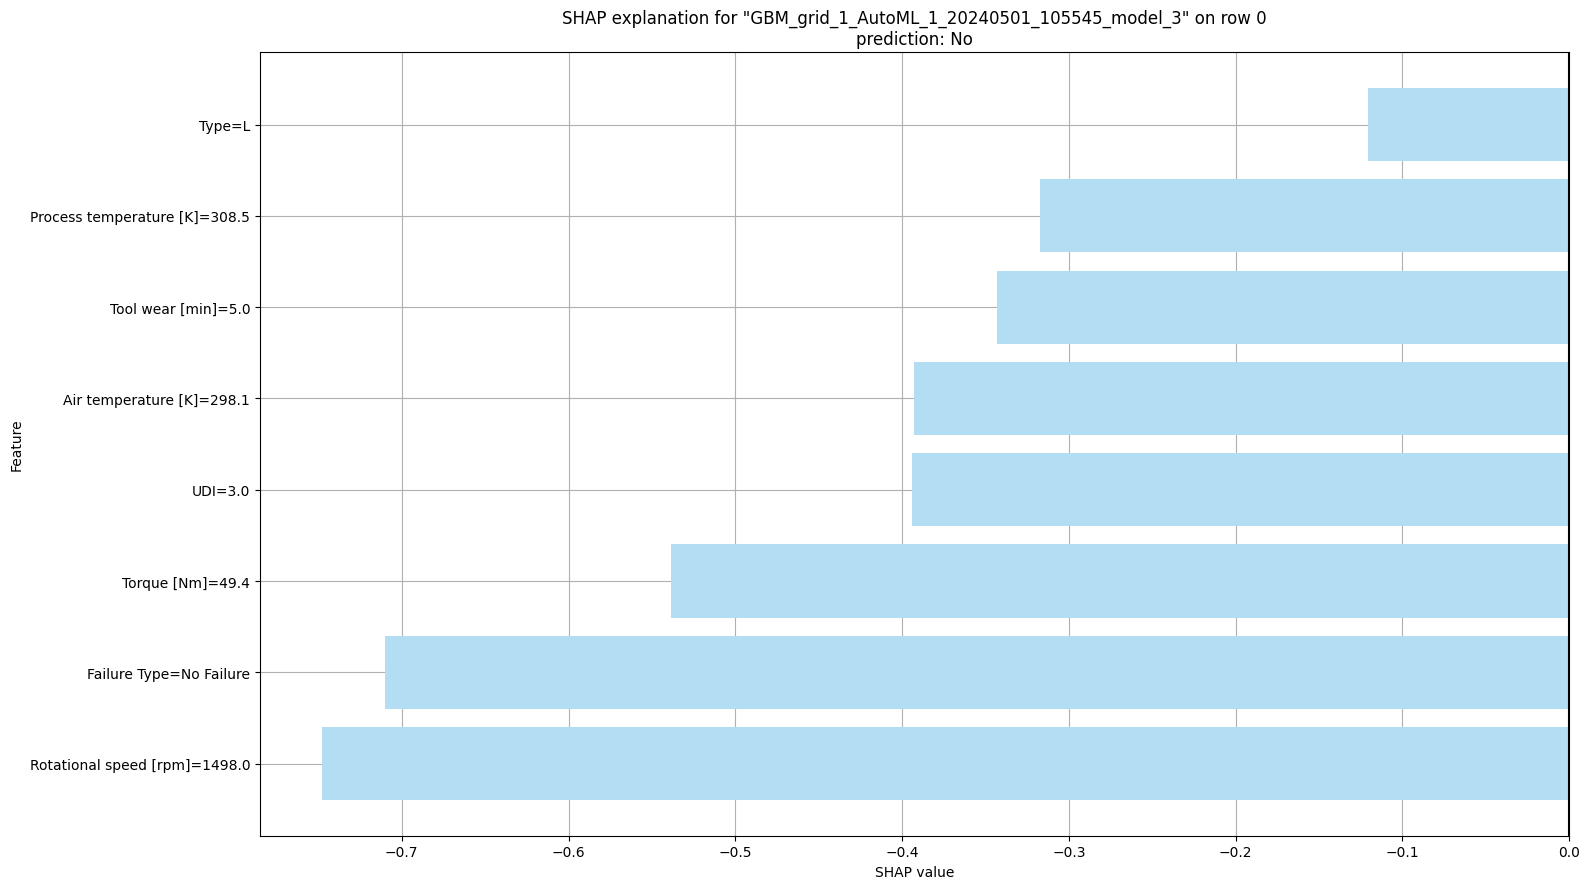

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,No,Sí
DRF_1_AutoML_1_20240501_105545,0.994895,0.0135572,0.976332,0.0147059,0.0367335,0.00134935,471,0.010517,DRF,No,1,0
GBM_grid_1_AutoML_1_20240501_105545_model_2,0.994857,0.00814439,0.975417,0.0147059,0.0314715,0.000990454,513,0.021256,GBM,No,0.999599,0.000400872
GBM_1_AutoML_1_20240501_105545,0.994256,0.00847404,0.974981,0.0147059,0.0317385,0.00100733,610,0.025816,GBM,No,0.999909,9.09297e-05
GBM_grid_1_AutoML_1_20240501_105545_model_4,0.994196,0.0118184,0.977374,0.0147059,0.0436097,0.00190181,1156,0.042277,GBM,No,0.999895,0.000104632
GBM_grid_1_AutoML_1_20240501_105545_model_3,0.992906,0.00881453,0.976704,0.0147059,0.0319646,0.00102173,722,0.022452,GBM,No,0.999922,7.82353e-05
GBM_5_AutoML_1_20240501_105545,0.99282,0.00835441,0.974216,0.0147059,0.0314687,0.000990282,536,0.018135,GBM,No,0.999588,0.000411678
GBM_2_AutoML_1_20240501_105545,0.991944,0.00854524,0.973985,0.0147059,0.0314746,0.000990648,462,0.016832,GBM,No,0.999739,0.00026082
DeepLearning_1_AutoML_1_20240501_105545,0.991019,0.017562,0.973347,0.0149615,0.0431763,0.00186419,413,0.00884,DeepLearning,No,1,3.82989e-07
GBM_grid_1_AutoML_1_20240501_105545_model_1,0.990903,0.0127367,0.977753,0.0147059,0.0405756,0.00164638,1573,0.045901,GBM,No,0.999988,1.23603e-05
GBM_3_AutoML_1_20240501_105545,0.990621,0.00911253,0.973458,0.0147059,0.0314764,0.000990767,645,0.019343,GBM,No,0.999886,0.000114224


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

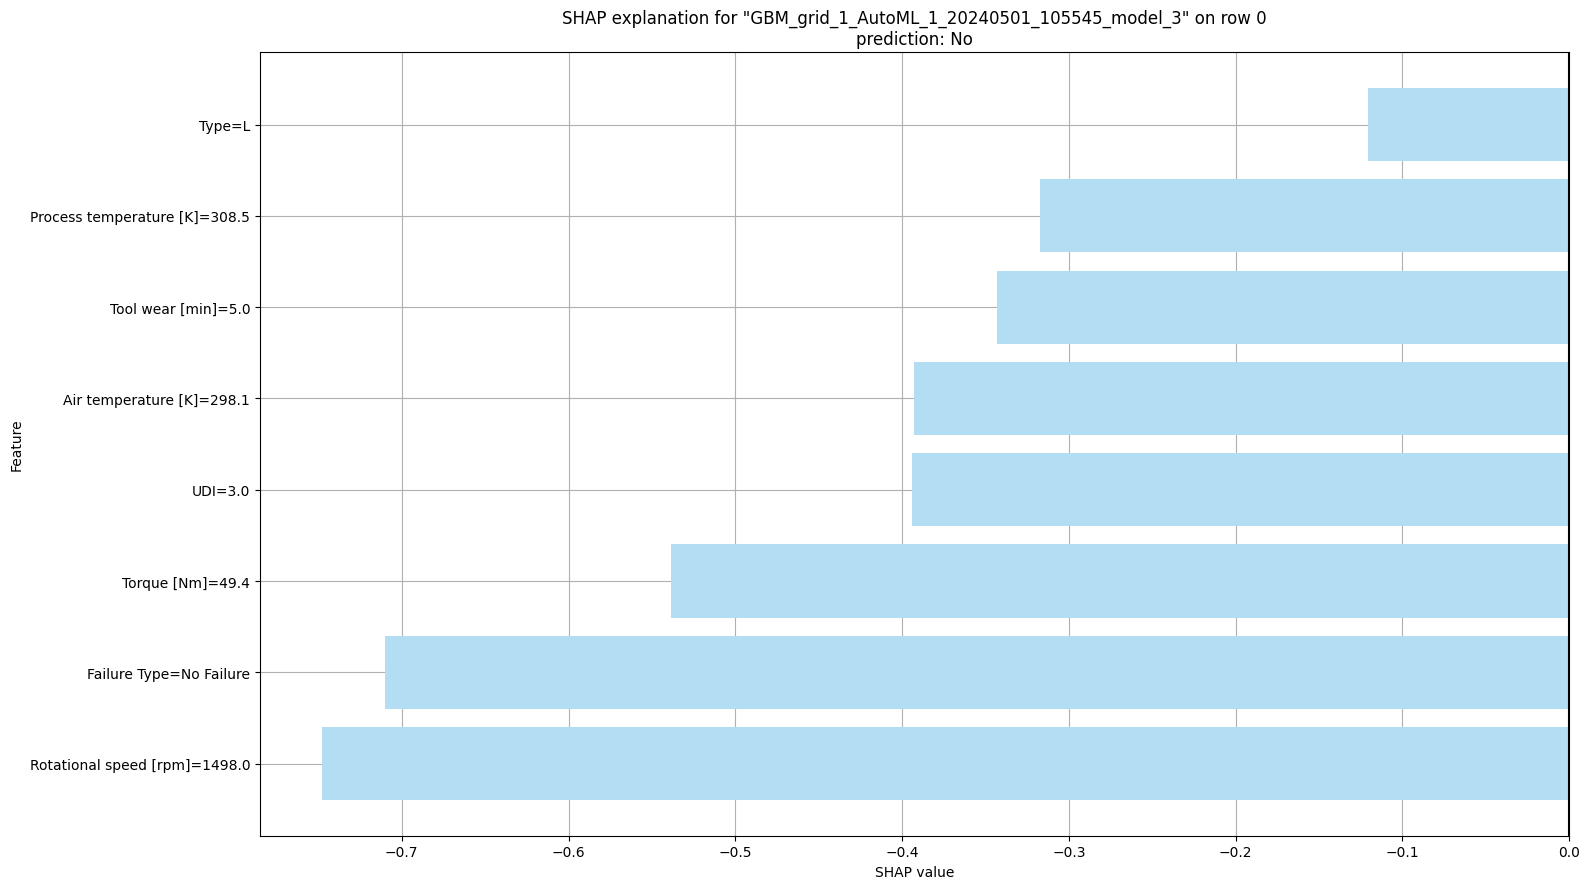

In [20]:
# Descripcion de la prediccion de un ejemplo
aml.explain_row(test, row_index=0)

## Análisis sobre el conjunto de prueba

El rendimiento del modelo líder parece ser excelente, con valores muy cercanos a 1 en todas las métricas, lo que indica un modelo altamente preciso y bien ajustado a los datos de prueba.